# Evaulation

This notebook is setup to help evaluate the runs

In [1]:
%matplotlib inline
from dotmap import DotMap
from envs import *
import os
import dill as pickle
import run_learning
import run_eval
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]
from stable_baselines3 import SAC

# Find Desired Runs

In [6]:
def look_through_folders():
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            print("Eps: ", str(params.eps), ", Gamma: ", str(params.gamma), ", LearningRate: ", str(params.learning_rate))
            print("Eval_Freq: ", str(params.init_state))
look_through_folders()

Eps:  1 , Gamma:  0.98 , LearningRate:  0.003
Eval_Freq:  DotMap()
Eps:  1 , Gamma:  0.95 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  0.01 , Gamma:  0.99 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  10 , Gamma:  0.99 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  10 , Gamma:  0.95 , LearningRate:  0.003
Eval_Freq:  DotMap()
Eps:  0.1 , Gamma:  0.95 , LearningRate:  0.003
Eval_Freq:  DotMap()
Eps:  10 , Gamma:  0.95 , LearningRate:  0.0003
Eval_Freq:  DotMap()
Eps:  10 , Gamma:  0.95 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  1 , Gamma:  0.98 , LearningRate:  0.0003
Eval_Freq:  DotMap()
Eps:  0.01 , Gamma:  0.98 , LearningRate:  0.0003
Eval_Freq:  DotMap()
Eps:  1 , Gamma:  0.98 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  0.1 , Gamma:  0.98 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  1 , Gamma:  0.99 , LearningRate:  3e-05
Eval_Freq:  DotMap()
Eps:  10 , Gamma:  0.99 , LearningRate:  0.0003
Eval_Freq:  DotMap()
Eps:  0.1 , Gamma:  0.99 , LearningRate:  0

In [3]:
def check(params):
    match = bool(1
    and params.gamma == 0.98
    #and params.eps == 1
    and params.learning_rate == 0.0003
    )
    return match

def filt(check):
    matches = []
    for folder in os.listdir("./Runs"):
        folder_param_path = os.path.join(os.path.join("./Runs", folder), "params.pkl")
        if os.path.exists(folder_param_path):
            with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
                params = pickle.load(f)
            if check(params):
                matches.append(folder)
    return matches

filt(check)

['02_02_2022_154851_Mohsin',
 '02_03_2022_120538_Mohsin',
 '02_03_2022_015729_Mohsin',
 '02_02_2022_053941_Mohsin']

# Evaluate Desired Runs

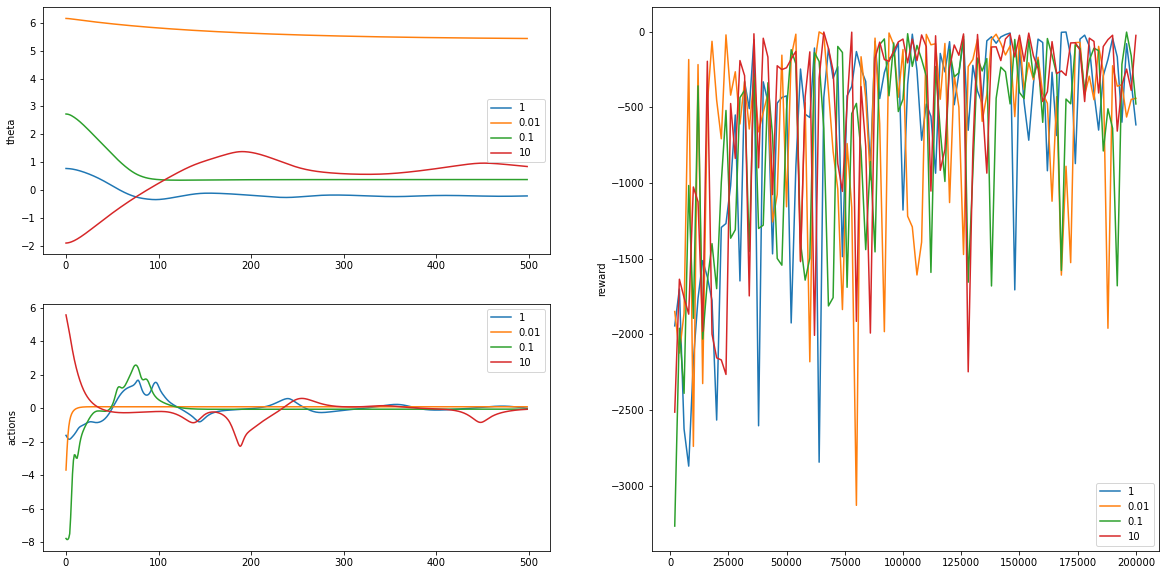

In [8]:
label = "eps"

def plot_eval(folders):
    plt.figure()
    for folder in folders:
        results = run_eval.evaluate(folder)
        tb = results["pendulum"]["mean_reward"]
        tb_times = tb[0]
        tb_rew = [a[0] for a in tb[1]]
        theta = results["pendulum"]["thetas"]
        actions = results["pendulum"]["actions"]
        with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f)
        plt.subplot(122)
        plt.plot(tb_times, tb_rew, label=str(params[label]))
        plt.subplot(221)
        plt.plot(theta, label=str(params[label]))
        plt.subplot(223)
        plt.plot(actions, label=str(params[label]))   
        
    plt.subplot(122)
    plt.ylabel("reward")
    plt.legend()
    plt.subplot(221)
    plt.ylabel("theta")
    plt.legend()
    plt.subplot(223)
    plt.ylabel("actions")
    plt.legend()
    plt.show()
        
plot_eval(filt(check))

# Rendering Station

DON"T USE YET, BEHAVIOR NOT WORKING

In [9]:
folder = '02_02_2022_165556_Mohsin'
env_name = 'pendulum'
model_name = 'best_model'
with open(os.path.join(os.path.join("./Runs", folder), "params.pkl"), 'rb') as f:
            params = pickle.load(f)
env = params.envs[env_name].eval_env
env.set_params(params.envs[env_name])
env.reset()
models_path = os.path.join(os.path.join("./Runs", folder), env_name + "/models")
model = SAC.load(os.path.join(models_path, model_name))

obs = env.reset()
done = False
i = 0
while not done:
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    #env.render()

NameError: name 'SAC' is not defined